# Numerical modeling in marine ecology
Dr. Ken Andersen's Lab
Date 1-02-2022

## Diffusion equation
1 Setting parameters
u - velocity
D - diffusivity
depth 

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Given variables

In [68]:
u = 0.04        # setteling velocity  (meter/day) 
D = 0.5        # Diffusivity      (meter/day )
depth = 100     # meter
n_d = 10                # 10 worked fine
delta_z = depth/n_d
print('Height of each depth grid =',delta_z, 'meters')

Height of each depth grid = 10.0 meters


#########################
Depth grid for computing
########################

In [69]:
z = np.arange((0.5 * delta_z),(depth - 0.5*delta_z)+delta_z,delta_z)
#for i in range(len(z)):
#    z[i] = float(z[i])
z

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.])

########################## Array grids ################################

In [70]:
# ø grid 
phi = np.zeros(n_d)

# advection flux
j_a = np.zeros(n_d+1)

# diffusion flux
j_d = np.zeros(n_d+1)

# total flux
j = np.zeros(n_d+1)


# dphi/dt
dphi_dt = np.zeros(n_d)

## Initial condition for phi?

In [71]:
phi = np.ones(n_d)
for i in range(len(phi)):
    phi[i] = phi[i] * (10)

phi[0] = 0
phi[n_d-1]=0
#phi[10] = 10000

# Timespan

In [73]:
# time steps need to be defined for python ode solver functions
#t = np.linspace(1,100,100)
t = (1,5000)
t
#t_eval = (1,100)

(1, 5000)

# *** Computation ***

## Reaction Advection Diffusion - Equation 

In [74]:
def diff_ode(t,phi):

    for i in range(1,n_d):  
    
        # advection flux
        j_a[i] = u * phi[i-1]
        j_a[0] = 0
        j_a[n_d] = 0
        
        # diffusionn flux
        j_d[i] = -D * (phi[i] - phi[i-1])/delta_z
        j_d[0] = 0
        j_d[n_d] = 0

    # advection flux + diffusion flux
    j = j_a + j_d  
    
    for i in range(1,n_d-1):
        dphi_dt[i] = -(j[i+1] - j[i])/delta_z  
        
    return dphi_dt

        #print(dphi_dt)

In [75]:
#diff_ode(t,dphi_dt)
#phi
#j

# Solver function for ODE scipy.integrate.solve_ivp

In [76]:
soln = solve_ivp(diff_ode,t,phi)  # odeint takes arguments as odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, 

In [77]:
soln_array = soln.y
print(soln_array)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+01 9.97186511e+00 9.79440120e+00 8.26312806e+00
  5.32712032e+00 3.798

In [78]:
print(soln_array.shape)
#max(soln_array.any())

(10, 59)


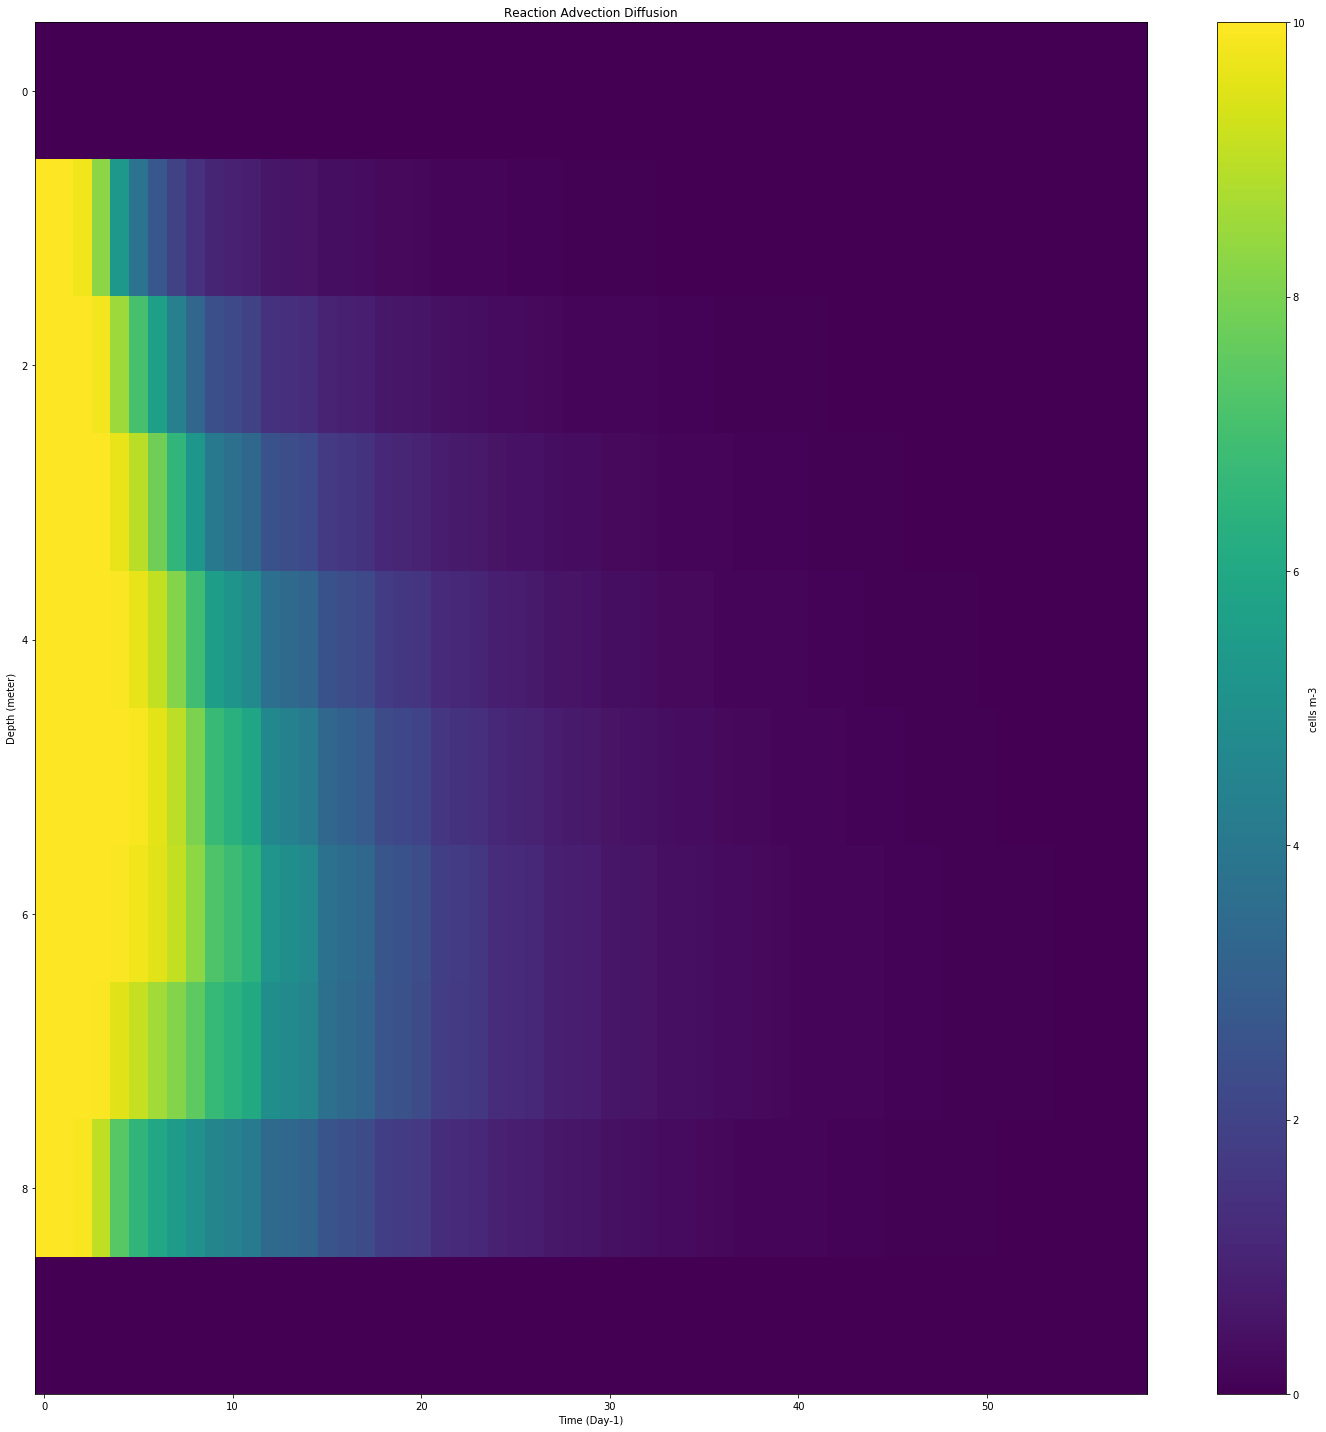

In [79]:
plt.title('Reaction Advection Diffusion')
plt.xlabel('Time (Day-1)')
plt.ylabel('Depth (meter)')
           

plt.imshow(soln_array , cmap = 'viridis', aspect = 'auto')
cb = plt.colorbar()
cb.set_label('cells m-3')
#plt.show()

# Plot of dø/dt matrix 

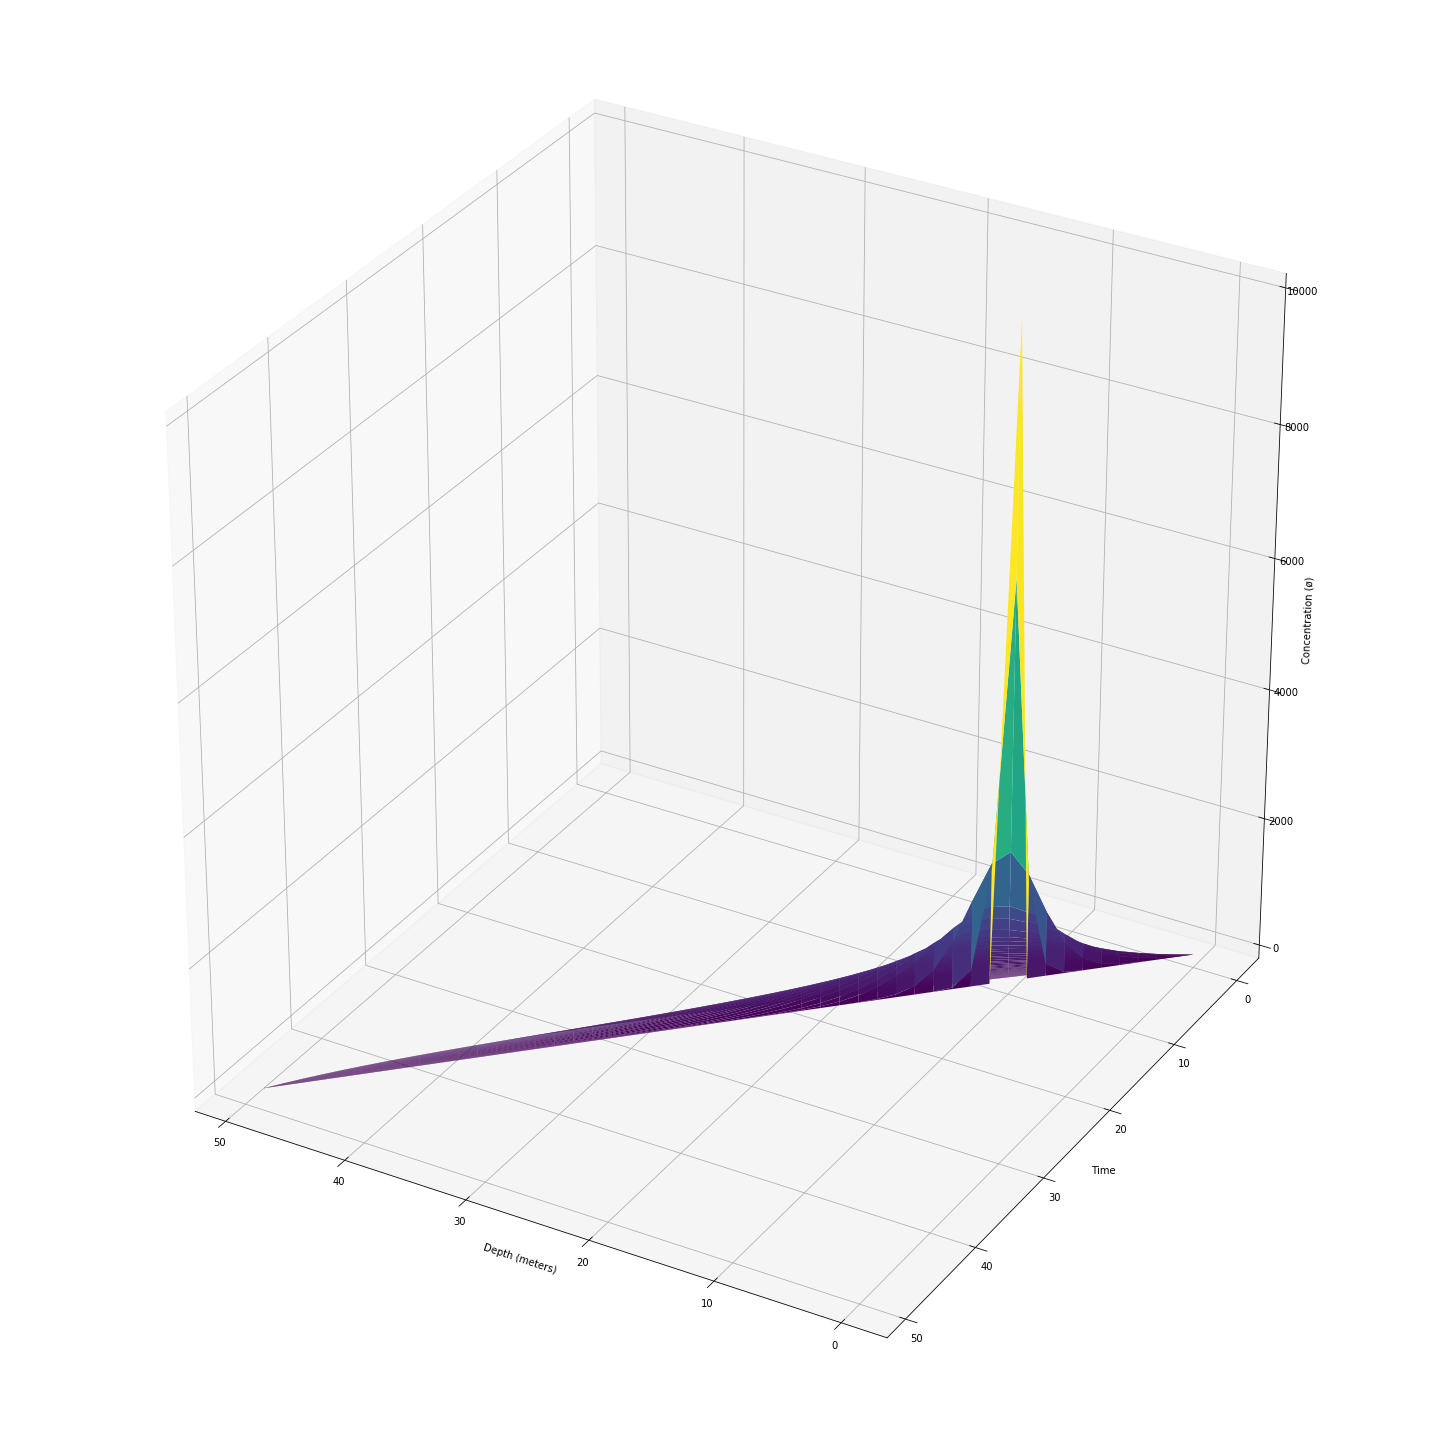

<Figure size 1440x1440 with 0 Axes>

In [33]:
x = range(50)
y = range(50)
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = soln_array

z = np.transpose(data)
#z = data

#label axes
ax.set_xlabel('Depth (meters)')
ax.set_ylabel('Time')
ax.set_zlabel('Concentration (ø)')


surf = ax.plot_surface(x, y, z, shade = True,  alpha=1, cmap = cm.viridis)
ax.view_init(30,120)
plt.show()

plt.savefig('/Users/manasi/Documents/rectn_diffusn_3d.png')

In [34]:
len(soln_array)

50

In [35]:
soln_array[1]

array([ 1.        ,  0.99947544,  0.99445205,  0.94671045,  0.86117592,
        0.77065756,  0.67465838,  0.57394488,  0.48406687,  0.43152259,
        0.54158318,  1.29187984,  3.78964376,  4.90158572,  6.13055176,
       13.00168237, 14.24431411, 15.49584434, 22.57198661, 24.11214693,
       25.60739705, 30.95808632, 32.19769352, 33.36601789, 37.28699498,
       38.00440231, 38.66696036, 40.86621324, 41.29045347, 41.66252219,
       42.64938406, 42.81033945, 42.93254044, 43.09084416, 43.08063597,
       43.04020036, 42.64414957, 42.52241389, 42.37459352, 41.62402004,
       41.43606203, 41.22691644, 40.25803998, 40.03089711, 39.78466884,
       38.70696949, 38.45686735, 38.18943712, 37.05221051, 36.79650929,
       36.52502923, 35.37471212, 35.1185541 , 34.84731637, 33.71447295,
       33.46323268, 33.19776695, 32.09337666, 31.85173098, 31.59651329,
       30.53453317, 30.30286143, 30.05807207, 29.04397715, 28.82378658,
       28.59102788, 27.62590429, 27.41776194, 27.19749051, 26.28

In [36]:
sum??

Signature: sum(iterable, start=0, /)
Docstring:
Return the sum of a 'start' value (default: 0) plus an iterable of numbers

When the iterable is empty, return the start value.
This function is intended specifically for use with numeric values and may
reject non-numeric types.
Type:      builtin_function_or_method


In [37]:
# setting up the formulas
# i is set to zero to avoid python error 'i is not defined'
i = 0

# advection flux
#j_a[i] = u * phi[i-1]

# diffusionn flux
#j_d[i] = -D * (phi[i] - phi[i-1])/delta_z

# advection flux + diffusion fluxS
#j[i]   = j_a[i] + j_d[i]  

# numerator of diff. equation
#d_i1    = j[i+1]  # 

#d_i    = j[i]


#j[0] = 0
#j_a[0] = 0
#j_d[0] = 0


# y0 is the initial condition for diff equation solver
y0 = j
j

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
# setting up the formulas
# i is set to zero to avoid python error 'i is not defined'
#i = 0

# advection flux
#j_a[i] = u * phi[i-1]

# diffusionn flux
#j_d[i] = -D * (phi[i] - phi[i-1])/delta_z

# advection flux + diffusion fluxS
#j[i]   = j_a[i] + j_d[i]  

# numerator of diff. equation
#d_i1    = j[i+1]  # 

#d_i    = j[i]


#j[0] = 0
#j_a[0] = 0
#j_d[0] = 0


# y0 is the initial condition for diff equation solver
#y0 = j
#j
#j_a
#j_d

In [39]:
#y0 = soln.y[1]
    #k = k+ 1
    #print(k)

In [40]:
odeint??

Signature:
odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Source:   
def odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0,
           ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0,
           hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12,
           mxords=5, printmessg=0, tfirst=False):
    """
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.

    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.

    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::

        dy/dt = f